In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats#regression
df= pd.read_csv("Social media influence on shopping.csv")
df.head(5)

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,None,947,0.354


In [5]:
#columns and rows
df.shape


(1450, 6)

In [3]:
df.columns

Index(['Question', 'Segment Type', 'Segment Description', 'Answer', 'Count',
       'Percentage'],
      dtype='object')

In [4]:
#checking for null values, returns a boolean
df.isnull()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1445,False,False,False,False,False,False
1446,False,False,False,False,False,False
1447,False,False,False,False,False,False
1448,False,False,False,False,False,False


In [5]:
#Answer columns values and appearancees
df["Answer"].value_counts()


Facebook     290
Instagram    290
Snapchat     290
Twitter      290
None         290
Name: Answer, dtype: int64

In [6]:
#Segment Type columns values and count
df["Segment Type"].value_counts()

University    870
Custom        560
Gender         10
Mobile          5
Web             5
Name: Segment Type, dtype: int64

# Statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Question             1450 non-null   object 
 1   Segment Type         1450 non-null   object 
 2   Segment Description  1450 non-null   object 
 3   Answer               1450 non-null   object 
 4   Count                1450 non-null   int64  
 5   Percentage           1450 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 68.1+ KB


In [17]:
df["Answer"].mode()


0     Facebook
1    Instagram
2         None
3     Snapchat
4      Twitter
Name: Answer, dtype: object

In [6]:
df["Segment Description"].nunique().

289

In [12]:
#Common Segment Type
df["Segment Type"].mode()

0    University
Name: Segment Type, dtype: object

In [19]:
df.describe()

,Count,Percentage
count,1450.000000,1450.000000
mean,35.013793,0.199313
std,95.055604,0.274989
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.063500
75%,20.000000,0.323750
max,947.000000,1.000000


In [24]:
corr = df.corr()
corr

,Count,Percentage
Count,1.000000,0.135205
Percentage,0.135205,1.000000


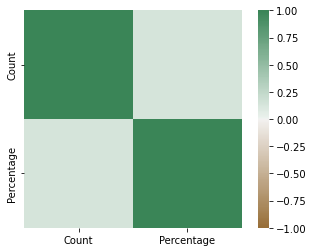

In [32]:
#heatmap, used to visualize correlation using seaborn
axis_corr = sns.heatmap(corr, vmin  = -1, vmax = 1, center =0,
                        cmap = sns.diverging_palette(50, 500, n = 500), square = True)

In [48]:
#creating Regression table
model = smf.ols("Count~Percentage", data = df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     26.96
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           2.37e-07
Time:                        10:37:53   Log-Likelihood:                -8647.6
No. Observations:                1450   AIC:                         1.730e+04
Df Residuals:                    1448   BIC:                         1.731e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.6987      3.056      8.409      0.000      19.704      31.694
Percentage    46.7362      9.001      5.193      0.000      29.081      64.392
==============================================================================
Omnibus:                     1380.413   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47854.045
Skew:                           4.586   Prob(JB):                         0.00
Kurtosis:                      29.607   Cond. No.                         3.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Linear regression using stats.lingress
x = df["Count"]
y = df["Percentage"]
linreg = stats.linregress(x,y)
linreg


LinregressResult(slope=0.00039113774929132176, intercept=0.18561788721964112, rvalue=0.1352046022059531, pvalue=2.3693744454108176e-07, stderr=7.532649037163181e-05, intercept_stderr=0.007628198078136312)

In [49]:
#Grouping
df.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,None,947,0.354


Text(0.5, 1.0, 'Segment Type vs Count')

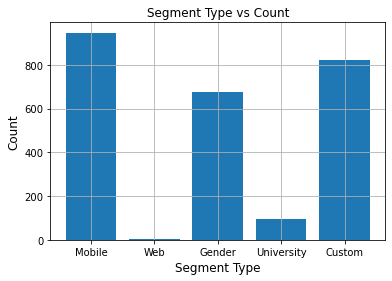

In [49]:
plt.bar(df["Segment Type"], df["Count"])
plt.grid()
plt.ylabel("Count", fontsize=12)
plt.xlabel("Segment Type", fontsize=12)
plt.title("Segment Type vs Count", fontsize =12)

Text(0.5, 1.0, 'Answer vs Count')

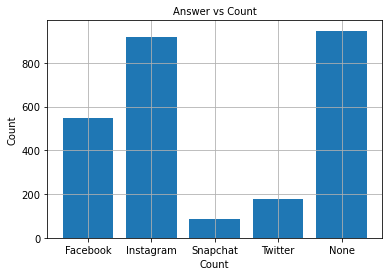

In [65]:
plt.bar(df["Answer"], df["Count"])
plt.grid()
plt.ylabel("Count", fontsize = 10)
plt.xlabel("Count", fontsize = 10)
plt.title("Answer vs Count", fontsize = 10)